# Image segmentation with clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import random

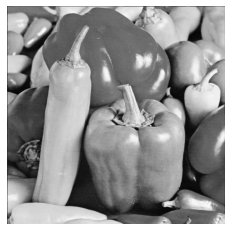

In [3]:
image_pepper = np.array(Image.open('img/pepper.bmp').convert('L'))

plt.axis('off')
plt.imshow(image_pepper, cmap='gray')

In [5]:
histogram = np.histogram(image_pepper, bins=256, range=(0, 256))[0]

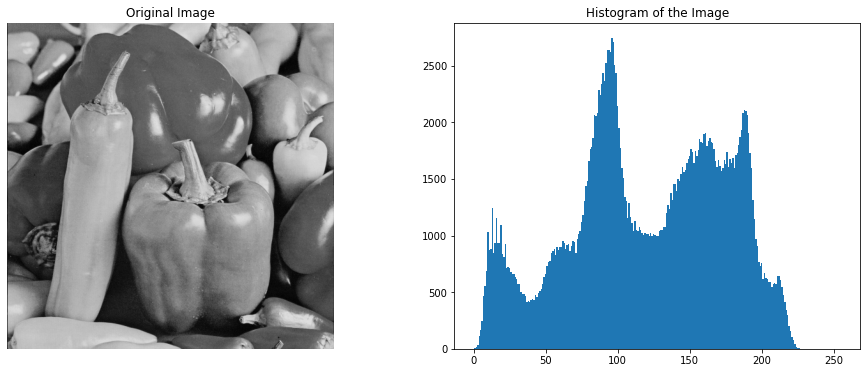

In [6]:
plt.figure(figsize=(16, 6))

image_pepper_to_show = cv2.imread('img/pepper.bmp', cv2.IMREAD_GRAYSCALE)
image_pepper_to_show = cv2.cvtColor(image_pepper_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.axis('off')
plt.title("Original Image")
plt.imshow(image_pepper_to_show)


plt.subplot(122)
plt.bar(np.arange(256), histogram, width=1.0)
plt.title("Histogram of the Image")

plt.show()

In [7]:
def algo_seuillage(img, proposition=1):
    seuil = random.randint(0, 255)
    while True :

        seuil_old = seuil
        moyenne_inf, moyenne_sup, nb_inf, nb_sup = 0, 0, 0, 0

        for i in range(len(img)):
            for j in range(len(img[0])):
                if img[i][j] < seuil:
                    moyenne_inf += img[i][j]
                    nb_inf += 1
                else:
                    moyenne_sup += img[i][j]
                    nb_sup += 1
        if nb_inf != 0:
            moyenne_inf = moyenne_inf / nb_inf
        if nb_sup != 0:
            moyenne_sup = moyenne_sup / nb_sup

        seuil = (moyenne_inf + moyenne_sup) / 2

        if seuil == seuil_old:
            break

    if proposition == 1:
        S1, S2 = 0, 255
    elif proposition == 2:
        S1, S2 = moyenne_inf, moyenne_sup

    img_seuillee = np.zeros((len(img), len(img[0])))

    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] < seuil:
                img_seuillee[i][j] = S1
            else:
                img_seuillee[i][j] = S2

    return img_seuillee

In [8]:
img_seuillee_1 = algo_seuillage(image_pepper, 1)
image1 = Image.fromarray(img_seuillee_1.astype('uint8'))
image1.save('img/pepper_seuillee_1.png')

img_seuillee_2 = algo_seuillage(image_pepper, 2)
image2 = Image.fromarray(img_seuillee_2.astype('uint8'))
image2.save('img/pepper_seuillee_2.png')

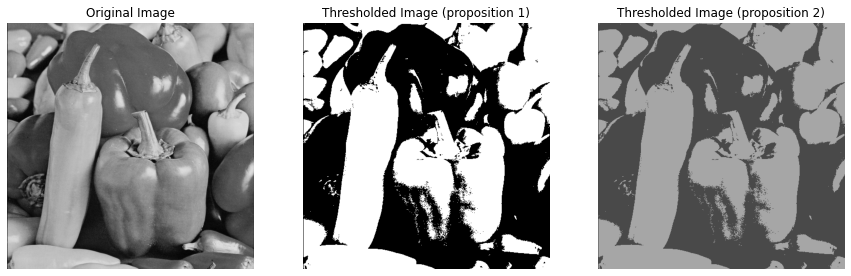

In [13]:
plt.figure(figsize=(15, 15))

image_pepper_to_show = cv2.imread('img/pepper.bmp', cv2.IMREAD_GRAYSCALE)
image_pepper_to_show = cv2.cvtColor(image_pepper_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(131)
plt.axis('off')
plt.title("Original Image")
plt.imshow(image_pepper_to_show)


img_seuillee_1_to_show = cv2.imread('img/pepper_seuillee_1.png')
img_seuillee_1_to_show = cv2.cvtColor(img_seuillee_1_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(132)
plt.axis('off')
plt.title("Thresholded Image (proposition 1)")
plt.imshow(img_seuillee_1_to_show)


img_seuillee_2_to_show = cv2.imread('img/pepper_seuillee_2.png')
img_seuillee_2_to_show = cv2.cvtColor(img_seuillee_2_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(133)
plt.axis('off')
plt.title("Thresholded Image (proposition 2)")
plt.imshow(img_seuillee_2_to_show)

plt.savefig('img/4_binary_thresholding.jpg')
plt.show()

In [10]:
def k_means(img, K):

    max_iter = 100
    cpt = 0

    centres = []
    for i in range(K):
        centres.append(random.randint(0, 255))
    centres.sort()

    while True:

        cpt += 1

        centres_old = centres.copy()

        classes = []
        for i in range(K):
            classes.append([])
        for i in range(len(img)):
            for j in range(len(img[0])):
                distance = 255
                classe = 0
                for k in range(K):
                    if abs(img[i][j] - centres[k]) < distance:
                        distance = abs(img[i][j] - centres[k])
                        classe = k
                classes[classe].append(img[i][j])

        for i in range(K):
            if len(classes[i]) != 0:
                centres[i] = sum(classes[i]) / len(classes[i])

        if centres_old == centres or cpt == max_iter:
            break
    
    img_seuillee = np.zeros((len(img), len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[0])):
            distance = 255
            classe = 0
            for k in range(K):
                if abs(img[i][j] - centres[k]) < distance:
                    distance = abs(img[i][j] - centres[k])
                    classe = k
            img_seuillee[i][j] = centres[classe]

    return img_seuillee 
    

In [11]:
img_seuillee = k_means(image_pepper, 4)

image = Image.fromarray(img_seuillee.astype('uint8'))
image.save('img/pepper_seuillee_K4.png')

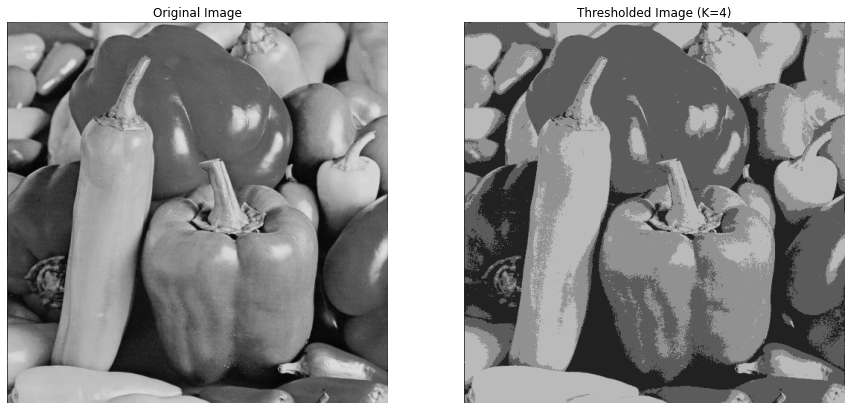

In [12]:
plt.figure(figsize=(15, 15))

image_pepper_to_show = cv2.imread('img/pepper.bmp', cv2.IMREAD_GRAYSCALE)
image_pepper_to_show = cv2.cvtColor(image_pepper_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.axis('off')
plt.title("Original Image")
plt.imshow(image_pepper_to_show)


img_seuillee_to_show = cv2.imread('img/pepper_seuillee_K4.png')
img_seuillee_to_show = cv2.cvtColor(img_seuillee_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(122)
plt.axis('off')
plt.title("Thresholded Image (K=4)")
plt.imshow(img_seuillee_to_show)

plt.show()

In [14]:
img_seuillee_k2 = k_means(image_pepper, 2)
image_k2 = Image.fromarray(img_seuillee_k2.astype('uint8'))
image_k2.save('img/pepper_seuillee_K2.png')

In [15]:
img_seuillee_k3 = k_means(image_pepper, 3)
image_k3 = Image.fromarray(img_seuillee_k3.astype('uint8'))
image_k3.save('img/pepper_seuillee_K3.png')

In [16]:
img_seuillee_k4 = k_means(image_pepper, 4)
image_k4 = Image.fromarray(img_seuillee_k4.astype('uint8'))
image_k4.save('img/pepper_seuillee_K4.png')

In [17]:
img_seuillee_k5 = k_means(image_pepper, 5)
image_k5 = Image.fromarray(img_seuillee_k5.astype('uint8'))
image_k5.save('img/pepper_seuillee_K5.png')

In [18]:
img_seuillee_k6 = k_means(image_pepper, 6)
image_k6 = Image.fromarray(img_seuillee_k6.astype('uint8'))
image_k6.save('img/pepper_seuillee_K6.png')

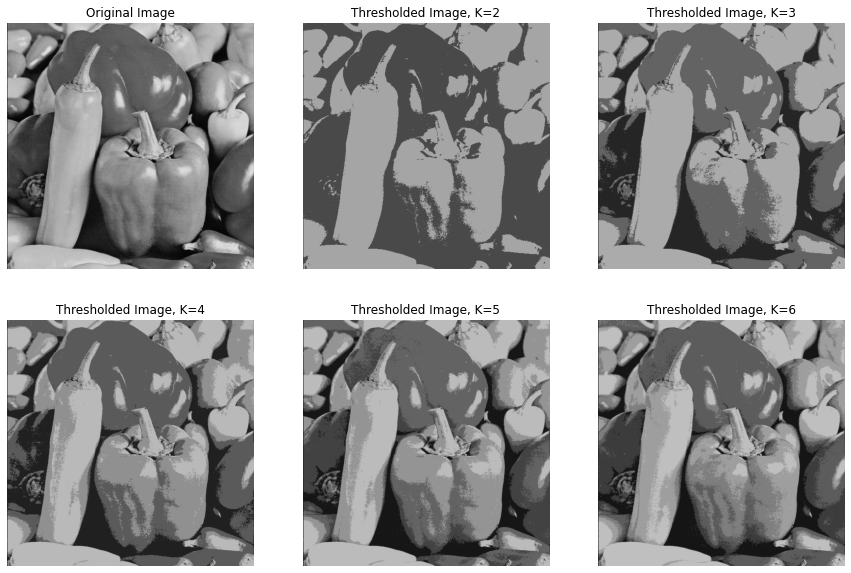

In [19]:
plt.figure(figsize=(15, 10))

image_pepper_to_show = cv2.imread('img/pepper.bmp', cv2.IMREAD_GRAYSCALE)
image_pepper_to_show = cv2.cvtColor(image_pepper_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(231)
plt.axis('off')
plt.title("Original Image")
plt.imshow(image_pepper_to_show)


img_seuillee_k2_to_show = cv2.imread('img/pepper_seuillee_K2.png')
img_seuillee_k2_to_show = cv2.cvtColor(img_seuillee_k2_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(232)
plt.axis('off')
plt.title("Thresholded Image, K=2")
plt.imshow(img_seuillee_k2_to_show)


img_seuillee_k3_to_show = cv2.imread('img/pepper_seuillee_K3.png')
img_seuillee_k3_to_show = cv2.cvtColor(img_seuillee_k3_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(233)
plt.axis('off')
plt.title("Thresholded Image, K=3")
plt.imshow(img_seuillee_k3_to_show)


img_seuillee_k4_to_show = cv2.imread('img/pepper_seuillee_K4.png')
img_seuillee_k4_to_show = cv2.cvtColor(img_seuillee_k4_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(234)
plt.axis('off')
plt.title("Thresholded Image, K=4")
plt.imshow(img_seuillee_k4_to_show)


img_seuillee_k5_to_show = cv2.imread('img/pepper_seuillee_K5.png')
img_seuillee_k5_to_show = cv2.cvtColor(img_seuillee_k5_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(235)
plt.axis('off')
plt.title("Thresholded Image, K=5")
plt.imshow(img_seuillee_k5_to_show)


img_seuillee_k6_to_show = cv2.imread('img/pepper_seuillee_K6.png')
img_seuillee_k6_to_show = cv2.cvtColor(img_seuillee_k6_to_show, cv2.COLOR_BGR2RGB)
plt.subplot(236)
plt.axis('off')
plt.title("Thresholded Image, K=6")
plt.imshow(img_seuillee_k6_to_show)

plt.savefig('img/4_k_means.jpg')
plt.show()